In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/women-entrepreneurship-and-labor-force/Dataset3.csv


# Importing the dataset

In [2]:
df = pd.read_csv("../input/women-entrepreneurship-and-labor-force/Dataset3.csv",header = 0,sep = ";", names=["No","Country","Level of development","European Union Membership","Currency",
                                       "Women Entrepreneurship Index","Entrepreneurship Index","Inflation rate","Female Labor Force Participation Rate"])
df.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


# One hot Encoding

In [4]:
df["Level of development"]=pd.get_dummies(df["Level of development"], drop_first=True)
df["European Union Membership"]=pd.get_dummies(df["European Union Membership"], drop_first=True)
df["Currency"]=pd.get_dummies(df["Currency"], drop_first=True)
df.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,0,0,0,54.9,64.9,0.90,67.1
1,6,Belgium,0,0,0,63.6,65.5,0.60,58.0
2,17,Estonia,0,0,0,55.4,60.2,-0.88,68.5
3,18,Finland,0,0,0,66.4,65.7,-0.20,67.7
4,19,France,0,0,0,68.8,67.3,0.00,60.6


**Swaping 1 and 0 for better understanding**

In [5]:
for i in range(len(df)):
    if(df.iloc[i, 2]==0):
        df.iloc[i, 2]=1
    elif(df.iloc[i, 2]==1):
        df.iloc[i, 2]=0
    if(df.iloc[i, 3]==0):
        df.iloc[i, 3]=1
    elif(df.iloc[i, 3]==1):
        df.iloc[i, 3]=0
    if(df.iloc[i, 4]==0):
        df.iloc[i, 4]=1
    elif(df.iloc[i, 4]==1):
        df.iloc[i, 4]=0
df.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,1,1,1,54.9,64.9,0.90,67.1
1,6,Belgium,1,1,1,63.6,65.5,0.60,58.0
2,17,Estonia,1,1,1,55.4,60.2,-0.88,68.5
3,18,Finland,1,1,1,66.4,65.7,-0.20,67.7
4,19,France,1,1,1,68.8,67.3,0.00,60.6


# Task 1: 

> Are European Union membership variable and development variable independent from each other?

In [6]:
print("Correlation of Level of development with European Union Member:",df.corr().iloc[1, 2])

Correlation of Level of development with European Union Member: 0.7572824456627532


**This gives some feeling that there must be some relation.**

In [7]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
chi, pval, dof, exp = chi2_contingency(pd.crosstab(df['Level of development'],df['European Union Membership']))
print('p-value is: ', pval)
significance = 0.05
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  3.042837837948524e-07
chi=26.222329, critical value=3.841459

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


**Hence, they are not independent.**

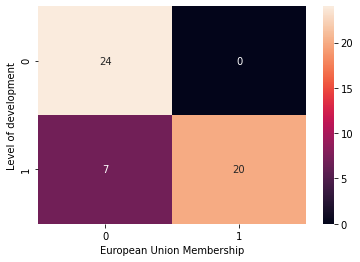

In [8]:
sns.heatmap(pd.crosstab(df['Level of development'], df['European Union Membership']), annot=True)

****This heatmap shows there is no European country which is not developed.****

# Task 2:
> Do the Women Entrepreneurship Index and Global Entrepreneurship Index values show a statistically significant difference between the countries that are members of the European Union and not?

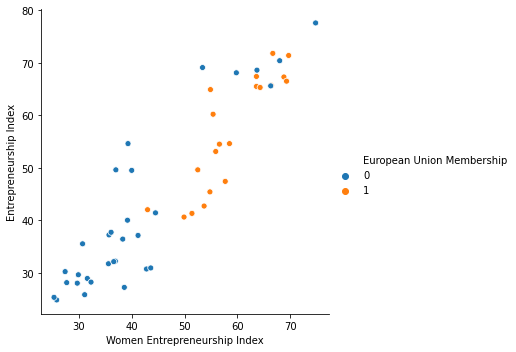

In [9]:
sns.relplot(data=df,x='Women Entrepreneurship Index',y='Entrepreneurship Index',hue='European Union Membership')

This graph shows that the Entrepreneurship index in European country is great same goes for Women Entrepreneurship Index.

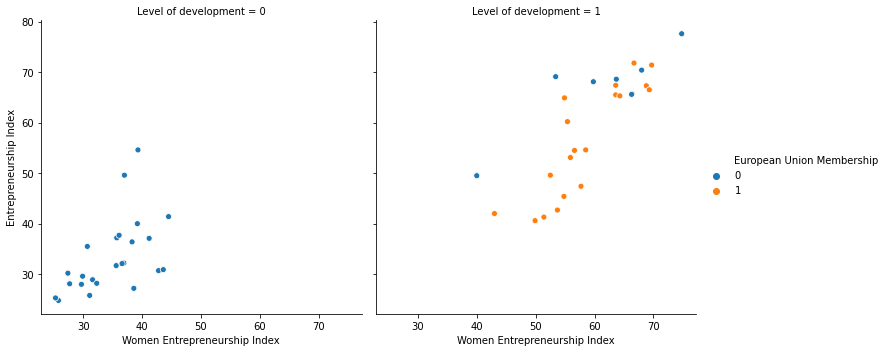

In [10]:
sns.relplot(data=df,x='Women Entrepreneurship Index',y='Entrepreneurship Index',
            hue='European Union Membership', col='Level of development')

This graph shows there is diffrenece.

In [11]:
from scipy.stats import mannwhitneyu
p = mannwhitneyu(df['Women Entrepreneurship Index'],df['Entrepreneurship Index'])
alpha = 0.05
if (p[1] > 1.96 or p[1] < -1.96):
    print('There is no diffrenece between the ranks of the two columns p =',p[1])
else:
    print('There is diffrenece between the ranks of the two columns p =',p[1])

There is diffrenece between the ranks of the two columns p = 0.3867529381401229


# Task 3:
> Is there a statistically significant relationship between Women's Entrepreneurship Index and Global Entrepreneurship Index values? 

In [12]:
from scipy.stats import spearmanr
coef, p = spearmanr(df["Women Entrepreneurship Index"], df["Entrepreneurship Index"])
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p =',p)
else:
    print('Samples are correlated (reject H0) p =',p)

Spearmans correlation coefficient: 0.908
Samples are correlated (reject H0) p = 4.063302480431442e-20


In [13]:
print("Correlation of Women Entrepreneurship Index with Entrepreneurship Index:",df.corr().iloc[4, 5])

Correlation of Women Entrepreneurship Index with Entrepreneurship Index: 0.9145796628456234


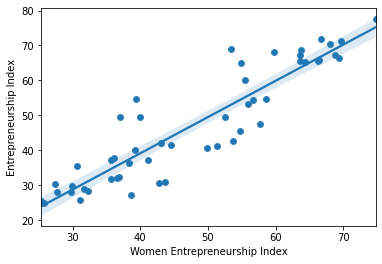

In [14]:
plt.figure()
sns.scatterplot(data=df, x="Women Entrepreneurship Index", y="Entrepreneurship Index")
sns.regplot(data=df, x="Women Entrepreneurship Index", y="Entrepreneurship Index")
plt.show()

Hence, both have positive correlation 

# **SOME MORE VISUALISATION**

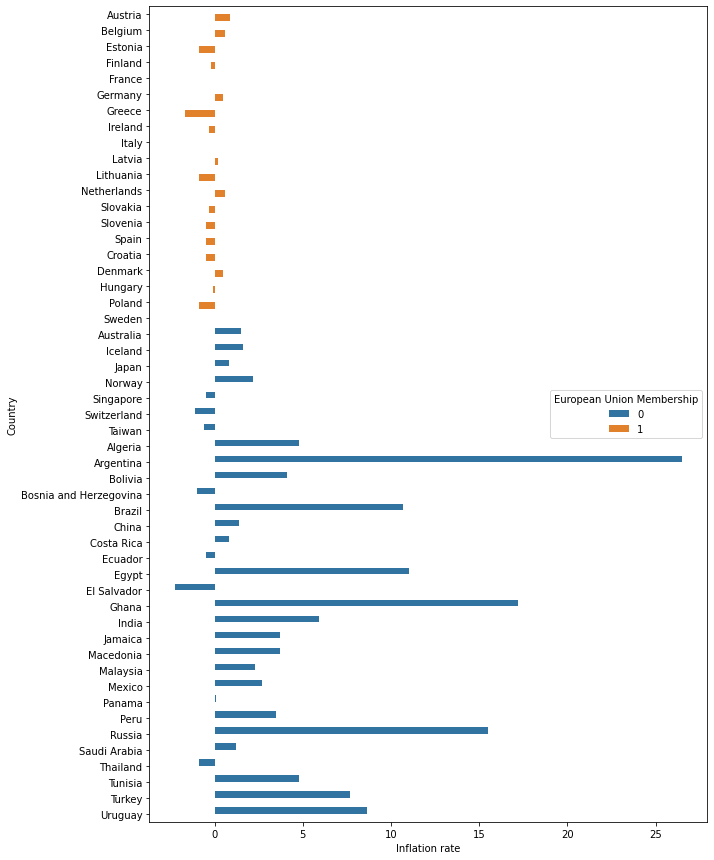

In [15]:
plt.figure(figsize=[10, 15])
sns.barplot(y='Country', x='Inflation rate', data=df, hue='European Union Membership')
plt.show()

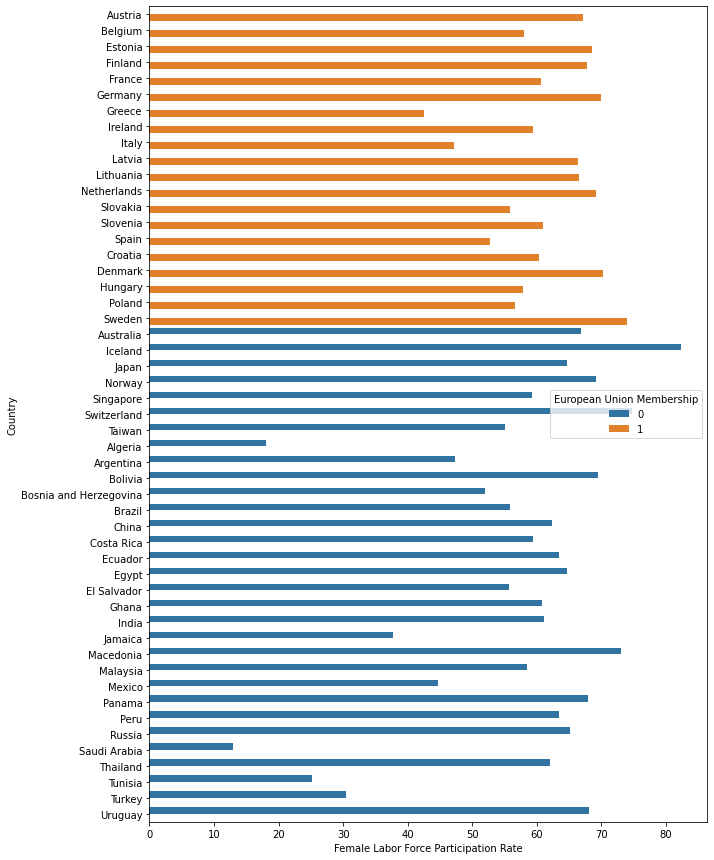

In [16]:
plt.figure(figsize=[10, 15])
sns.barplot(y='Country', x='Female Labor Force Participation Rate', data=df, hue='European Union Membership')
plt.show()

**PLEASE LIKE IF IT WAS USEFULL.**

# THANK YOU :)

PEACE ☮